In [34]:
# -------------------- #
# Imports              #
# -------------------- #

import numpy as np
import matplotlib.pyplot as plt
import lmfit
from lmfit.models import LinearModel as LM

In [8]:
# -------------------- #
# Settings             #
# -------------------- #

folder = "JURECA/Speedtest_1/Timing/"
savefolder = "JURECA_Plots2/"

N = 3360

config = "UNIX_config-MPI_Clusters_Speedtest"
steps = 10000
setup_name = "JURECA_Speedtest"
processes = np.array([1,2,3,4,5,6,7,8,10,12,14,15,16,20,21,24,28,30,32,35,40,42,48,56,60])

savename = savefolder + setup_name
save = False

In [9]:
# Program run time (total)
times_tot = np.zeros(len(processes))
# Program run time (calculation only)
times_calc = np.zeros(len(processes))
# Total calculation time (program calc_time * number of processes)
times_calc_tot = np.zeros(len(processes))
# Program run time (calculation only) per masspoint
times_calc_per_N = np.zeros(len(processes))
# Program run time (calculation only) per integration step
times_calc_per_step= np.zeros(len(processes))

for i,p in enumerate(processes):
    filename = folder + config + "_" + "p_" + str(p) + "_timing.txt"
    arr = np.genfromtxt(filename, delimiter=":")
    times_tot[i] = arr[0,1]
    times_calc[i] = arr[2,1]
    times_calc_tot[i] = arr[3,1]
    times_calc_per_N[i] = times_calc[i] / N;
    times_calc_per_step[i] = times_calc[i] / steps;
    
# Theoretical 'ideal' time for parallel program, assuming 100% parallel code
# Relative to time for serial program
times_ideal = np.copy(times_calc)
times_ideal_per_N = np.copy(times_calc_per_N)
times_ideal_per_step = np.copy(times_calc_per_step)
for i,p in enumerate(processes):
    times_ideal[i] = times_calc[0]/p
    times_ideal_per_N[i] = times_ideal_per_N[0]/p
    times_ideal_per_step[i] = times_ideal_per_step[0]/p

In [50]:
(times_calc[6] - times_calc[7]) / times_calc[6]*100 / (8/7)

24.81420034832742

In [51]:
(times_calc[11] - times_calc[12]) / times_calc[11]*100 / (16/15)

21.789969593516904

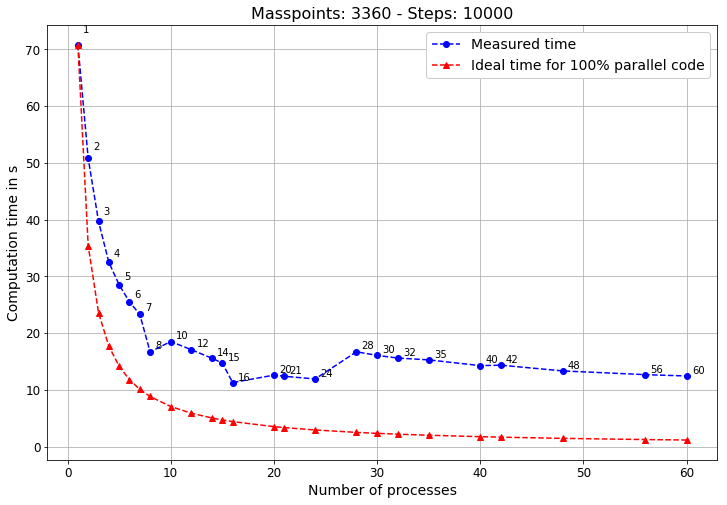

In [52]:
%matplotlib inline

fig = plt.figure(figsize=(12,8), dpi=100);

plt.plot(processes, times_calc, c="b", marker="o", ls="--", label="Measured time");
for i,p in enumerate(processes):
    plt.annotate(p, (p+0.5, times_calc[i]*1.03))
    
plt.plot(processes, times_ideal, c="r", marker="^", ls="--", label="Ideal time for 100% parallel code")

#plt.yscale('log');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Computation time in s", fontsize=14)
plt.xlabel("Number of processes", fontsize=14)
plt.title('Masspoints: ' + str(N) + " - Steps: " + str(steps), fontsize=16);
plt.grid();
plt.legend(fontsize=14, framealpha=1);

if (save):
    plt.savefig(savename + "_timing.png", dpi=400, bbox_inches='tight')

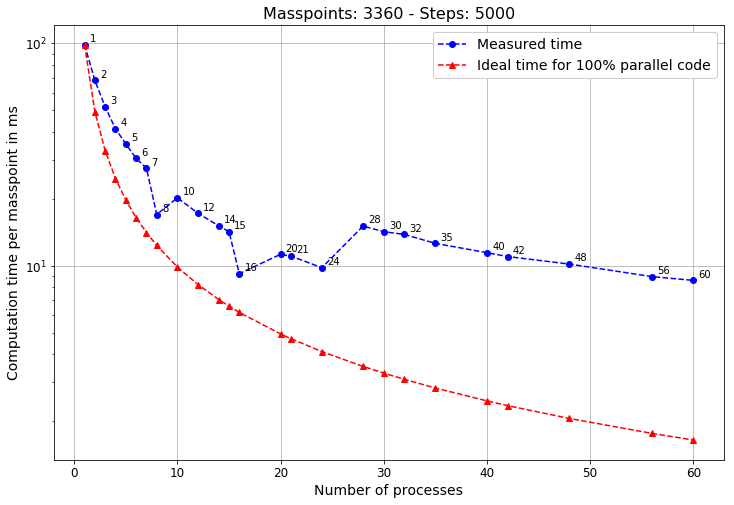

In [23]:
%matplotlib inline

fig = plt.figure(figsize=(12,8), dpi=100);

plt.plot(processes, times_calc_per_N*1000, c="b", marker="o", ls="--", label="Measured time");
for i,p in enumerate(processes):
    plt.annotate(p, (p+0.5, times_calc_per_N[i]*1000*1.03))
    
plt.plot(processes, times_ideal_per_N*1000, c="r", marker="^", ls="--", label="Ideal time for 100% parallel code")
    
plt.yscale('log');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Computation time per masspoint in ms", fontsize=14)
plt.xlabel("Number of processes", fontsize=14)
plt.title('Masspoints: ' + str(N) + " - Steps: " + str(steps), fontsize=16);
plt.grid();
plt.legend(fontsize=14, framealpha=1);

if (save):
    plt.savefig(savename + "_timing_per_N.png", dpi=400, bbox_inches='tight')

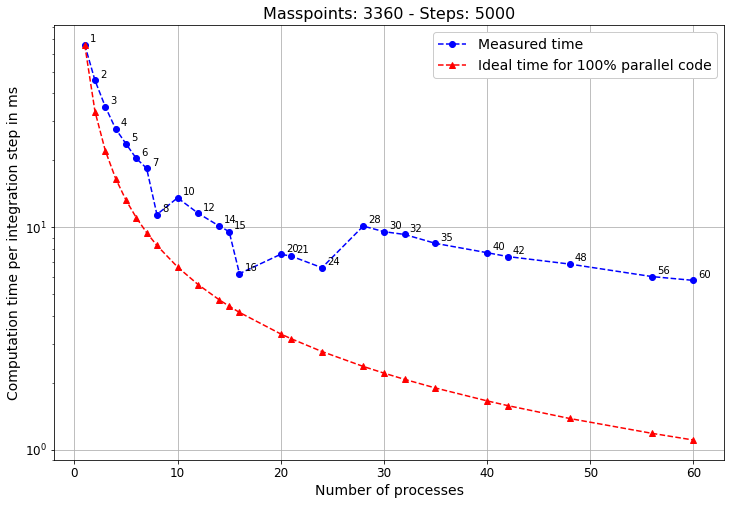

In [24]:
%matplotlib inline

fig = plt.figure(figsize=(12,8), dpi=100);

plt.plot(processes, times_calc_per_step*1000, c="b", marker="o", ls="--", label="Measured time");
for i,p in enumerate(processes):
    plt.annotate(p, (p+0.5, times_calc_per_step[i]*1000*1.03))
    
plt.plot(processes, times_ideal_per_step*1000, c="r", marker="^", ls="--", label="Ideal time for 100% parallel code")
    
plt.yscale('log');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Computation time per integration step in ms", fontsize=14)
plt.xlabel("Number of processes", fontsize=14)
plt.title('Masspoints: ' + str(N) + " - Steps: " + str(steps), fontsize=16);
plt.grid();
plt.legend(fontsize=14, framealpha=1);

if (save):
    plt.savefig(savename + "_timing_per_step.png", dpi=400, bbox_inches='tight')